# Procure-To-Pay Auditing: A Process Mining Approach

A lot of us have heard about Data mining.

### Insert that the names were gotten from http://www.random-name-generator.info/

In [1]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("eventlog_large.csv", sep=";")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Case_ID,Activity,User,Timestamp
0,1,a,u2,2016-04-15 08:41:28
1,1,b,u3,2016-04-18 12:55:01
2,2,a,u2,2016-04-18 20:40:14
3,1,d,u5,2016-04-19 07:22:59
4,2,b,u4,2016-04-21 22:42:39


In [44]:
df = df.sort_values(by=['Case_ID', 'Timestamp','Activity'], ascending=True).reset_index(drop=True)
df

,Case_ID,Activity,User,Timestamp
0,1,a,u2,2016-04-15 08:41:28
1,1,b,u3,2016-04-18 12:55:01
2,1,d,u5,2016-04-19 07:22:59
3,1,e,u7,2016-04-23 15:06:58
4,1,f,u7,2016-04-24 19:18:32
...,...,...,...,...
45374,7549,d,u5,2120-07-15 03:40:37
45375,7549,g,u6,2120-07-19 05:39:32
45376,7549,e,u7,2120-07-20 18:29:17
45377,7549,f,u7,2120-07-22 03:43:02


In [56]:
# Process details
new_df_1 = df.copy()
new_df_1 = new_df_1[['Case_ID','Timestamp','Activity','User']]
sort1 = new_df_1.iloc[:-1,:]
sort2 = new_df_1.iloc[1:,:].reset_index(drop=True)
sortnew = pd.concat([sort1,sort2],axis=1)
sortnew.columns = ['case','startTime','startEvent','startUser','case2','endTime','endEvent','endUser']

sortnew1 = sortnew.copy()
sortnew1['Comparison'] = sortnew1.apply(lambda x: True if x['case'] == x['case2'] else False,axis=1)
sortnew1 = sortnew1[sortnew1['Comparison'] == True]
sortnew1

,case,startTime,startEvent,startUser,case2,endTime,endEvent,endUser,Comparison
0,1,2016-04-15 08:41:28,a,u2,1,2016-04-18 12:55:01,b,u3,True
1,1,2016-04-18 12:55:01,b,u3,1,2016-04-19 07:22:59,d,u5,True
2,1,2016-04-19 07:22:59,d,u5,1,2016-04-23 15:06:58,e,u7,True
3,1,2016-04-23 15:06:58,e,u7,1,2016-04-24 19:18:32,f,u7,True
4,1,2016-04-24 19:18:32,f,u7,1,2016-04-25 14:56:42,g,u5,True
...,...,...,...,...,...,...,...,...,...
45373,7549,2120-07-14 22:42:16,b,u3,7549,2120-07-15 03:40:37,d,u5,True
45374,7549,2120-07-15 03:40:37,d,u5,7549,2120-07-19 05:39:32,g,u6,True
45375,7549,2120-07-19 05:39:32,g,u6,7549,2120-07-20 18:29:17,e,u7,True
45376,7549,2120-07-20 18:29:17,e,u7,7549,2120-07-22 03:43:02,f,u7,True


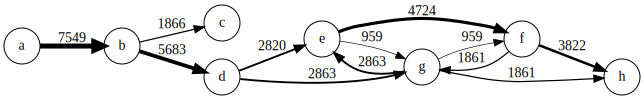

In [57]:
sortnew2 = sortnew1[['case', 'startEvent','endEvent']]
countsort2 = sortnew2.groupby(['startEvent','endEvent']).size()
newcountsort1 = countsort2.to_frame(name='Weight').reset_index()
# newcountsort1

H = graphviz.Digraph(format='jpeg')

H.attr(rankdir='LR')
H.attr('node', shape='circle')
H.attr('edge')

max_node = 5
max_case_id = newcountsort1['Weight'].max()

nodelist2 = []
for idx, row in newcountsort1.iterrows():
    node11, node22, weight2 = [str(i) for i in row]
    
    if node11 not in nodelist2:
        H.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        H.node(node22)
        nodelist2.append(node22)
        
    H.edge(node11, node22, label = weight2, penwidth=str(int(weight2)/max_case_id*max_node))
    
H
# .render('Control_Flow', view=True)

In [58]:
# Deriving the first and last activities of the cases to get the most frequent occuring start and end activities

activities_list = df.copy()
activities_list['Count'] = activities_list.groupby('Case_ID').cumcount()+1
activities_list = activities_list.pivot(index='Case_ID', columns='Count', values='Activity')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list['Last Activity'] = activities_list.apply(func, axis=1)
activities_list['First Activity'] = activities_list[1]
activities_list

Count,1,2,3,4,5,6,7,Last Activity,First Activity
Case_ID,,,,,,,,,
1,a,b,d,e,f,g,h,h,a
2,a,b,d,g,e,f,h,h,a
3,a,b,d,g,e,f,h,h,a
4,a,b,d,g,e,f,h,h,a
5,a,b,c,NaN,NaN,NaN,NaN,c,a
...,...,...,...,...,...,...,...,...,...
7545,a,b,d,e,f,g,h,h,a
7546,a,b,d,e,f,g,h,h,a
7547,a,b,d,g,e,f,h,h,a


In [59]:
# activities_list[activities_list['First Activity'] == 'Approve request']
activities_list['First Activity'].value_counts()

a    7549
Name: First Activity, dtype: int64

In [60]:
# Start Activities
start_act = activities_list.groupby(['First Activity']).size()
start_act = start_act.to_frame(name='Weight').reset_index()
start_act['Start'] = 'Start'
start_act = start_act[['Start','First Activity','Weight']]
start_act = start_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
start_act

,Start,First Activity,Weight
0,Start,a,7549


In [61]:
# End Activities
end_act = activities_list.groupby(['Last Activity']).size()
end_act = end_act.to_frame(name='Weight').reset_index()
end_act['End'] = 'End'
end_act = end_act[['Last Activity','End','Weight']]
end_act = end_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
end_act

,Last Activity,End,Weight
0,h,End,5683
1,c,End,1866


In [62]:
df.head(2)

,Case_ID,Activity,User,Timestamp
0,1,a,u2,2016-04-15 08:41:28
1,1,b,u3,2016-04-18 12:55:01


In [63]:
#Testing something else
sortnewtest = sortnew1.copy()
sortnewtest['Duration'] = (sortnewtest['endTime'] - sortnewtest['startTime']).dt.days
sortnewtest = sortnewtest[['startEvent','endEvent','Duration']]
sortnewtest = sortnewtest.groupby(['startEvent','endEvent']).agg({'Duration': ['mean'],'startEvent':['count']}).reset_index()
sortnewtest.columns = ['startEvent','endEvent', 'Duration', 'Count']
sortnewtest['Duration'] = round(sortnewtest['Duration'],0)
sortnewtest['Duration'] = sortnewtest['Duration'].astype('int')

sortnewtest

,startEvent,endEvent,Duration,Count
0,a,b,2,7549
1,b,c,1,1866
2,b,d,1,5683
3,d,e,3,2820
4,d,g,3,2863
5,e,f,1,4724
6,e,g,1,959
7,f,g,2,1861
8,f,h,2,3822
9,g,e,2,2863


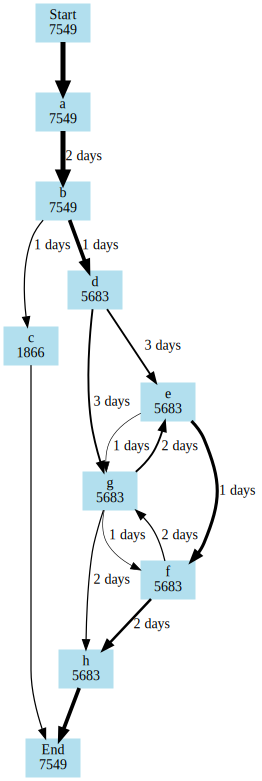

In [74]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='corleone', node_attr={'color': 'lightblue2', 'style': 'filled'})
g.attr('node', shape='box')

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Weight'].sum()))
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Weight'].sum()))
#     g.node(row['End'],label=row['End'] + '\n '+ str(start_act[start_act['End'] == row['End']]['Weight'].sum()))

for index, row in start_act.iterrows():
    g.edge(str(row["Start"]), str(row["First Activity"]), label=" ", penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

for index, row in sortnewtest.iterrows():
    g.node(row['startEvent'],label=row['startEvent'] + '\n '+ str(sortnewtest[sortnewtest['startEvent'] == row['startEvent']]['Count'].sum()))
    g.node(row['endEvent'],label=row['endEvent'] + '\n '+ str(sortnewtest[sortnewtest['endEvent'] == row['endEvent']]['Count'].sum()))

for index, row in sortnewtest.iterrows():
    g.edge(str(row["startEvent"]), str(row["endEvent"]), label=" " + str(row["Duration"]) + " days", penwidth=str(int(row["Count"])/max_case_id*max_node))

######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(end_act[end_act['Last Activity'] == row['Last Activity']]['Weight'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Weight'].sum()))

for index, row in end_act.iterrows():
    g.edge(str(row["Last Activity"]), str(row["End"]), label=" ", penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

g

In [ ]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='corleone', node_attr={'color': 'lightblue2', 'style': 'filled'})
g.attr('node', shape='box')

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Weight'].sum()))
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Weight'].sum()))
#     g.node(row['End'],label=row['End'] + '\n '+ str(start_act[start_act['End'] == row['End']]['Weight'].sum()))

for index, row in start_act.iterrows():
    g.edge(str(row["Start"]), str(row["First Activity"]), label=" ", penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

for index, row in sortnewtest.iterrows():
    g.node(row['startEvent'],label=row['startEvent'] + '\n '+ str(sortnewtest[sortnewtest['startEvent'] == row['startEvent']]['Count'].sum()))
    g.node(row['endEvent'],label=row['endEvent'] + '\n '+ str(sortnewtest[sortnewtest['endEvent'] == row['endEvent']]['Count'].sum()))

for index, row in sortnewtest.iterrows():
    g.edge(str(row["startEvent"]), str(row["endEvent"]), label=" " + str(row["Duration"]) + " days", penwidth=str(int(row["Count"])/max_case_id*max_node))

######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(end_act[end_act['Last Activity'] == row['Last Activity']]['Weight'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Weight'].sum()))

for index, row in end_act.iterrows():
    g.edge(str(row["Last Activity"]), str(row["End"]), label=" ", penwidth=str(int(row["Weight"])/max_case_id*max_node))

######################################################

g

In [ ]:
# variants33 = df_copy.copy()
# variants33['Count'] = variants33.groupby('case').cumcount()+1
# variants33 = variants33.pivot(index='case', columns='Count', values='event')
# variants33_col = variants33.columns
# variants33 = variants33.fillna('X')
# variants33 = variants33.astype('str')
# variants33['Trace'] = variants33.apply(lambda x: ','.join(x),axis=1)
# variants33['Trace'] = variants33['Trace'].apply(lambda x: x.replace(',X',''))
# # variants

# variants_num33 = variants33[['Trace',1]].groupby(['Trace'], as_index=False).count()
# variants_num33 = variants_num33.sort_values(by=1, ascending=False).reset_index()
# del variants_num33['index']
# variants_num33 = variants_num33.reset_index()
# variants_num33['index'] = variants_num33['index']+1
# variants_num33 = variants_num33.rename(columns={'index':'Variants',1:'No of occurance'})

# variants_num33